In [1]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization,Flatten
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Define data paths
dataset_dir = '/kaggle/input/hydra-paramecium-dataset/micro-dataset'
# d1='Hydra'
# d2='Paramecium'
train_dir = 'traindir'
test_dir = '/kaggle/working/testdir'


In [3]:
# Image parameters
img_width, img_height = 128, 128
batch_size = 8

# Split ratio for train-test split
split_ratio = 0.8

In [4]:
# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,shear_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# direct=[d1,d2]
# print(direct)

In [6]:
# work='/kaggle/working/'
# trial='trial'
# t=os.path.join(work,trial)
# if not os.path.exists(t):
#     os.makedirs(t)
# ttrain='ttrain_dir'
# train_dir=os.path.join(t,ttrain)
# ttest='ttest_dir'
# test_dir=os.path.join(t,ttest)
# # Split dataset into train and test directories
# if not os.path.exists(train_dir):
#     os.makedirs(train_dir)
# if not os.path.exists(test_dir):
#     os.makedirs(test_dir)
# print(train_dir)

In [7]:
# # Iterate through each class folder
# for class_folder in direct:
#     print(class_folder)
#     class_path = os.path.join(dataset_dir, class_folder)
#     tp= '/kaggle/input/microorganism-image-classification/Micro_Organism/Hydra'
#     print(class_path,'\n',tp)
# #     print(class_path)
#     if os.path.isdir(class_path):
#         # Create train and test class folders
#         train_class_folder = os.path.join(train_dir, class_folder)
# #         print(train_class_folder)
#         test_class_folder = os.path.join(test_dir, class_folder)
#         if not os.path.exists(train_class_folder):
#             os.makedirs(train_class_folder)
#         if not os.path.exists(test_class_folder):
#             os.makedirs(test_class_folder)

#         # Get image file names in the class folder
#         images = os.listdir(class_path)
#         random.shuffle(images)
#         print(images)

#         # Split images into train and test sets
#         train_images = images[:int(len(images) * split_ratio)]
#         test_images = images[int(len(images) * split_ratio):]

#         # Move images to respective train and test class folders
#         for train_image in train_images:
#             src = os.path.join(class_path, train_image)
#             print('src=',src)
#             dst = os.path.join(train_class_folder, train_image)
#             print('dst=',dst)
#             print('copying',src,'to',dst)
#             shutil.copy(src, dst)

#         for test_image in test_images:
#             src = os.path.join(class_path, test_image)
#             dst = os.path.join(test_class_folder, test_image)
#             shutil.copy(src, dst)


In [8]:
# Split dataset into train and test directories
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Iterate through each class folder
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        # Create train and test class folders
        train_class_folder = os.path.join(train_dir, class_folder)
        test_class_folder = os.path.join(test_dir, class_folder)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get image file names in the class folder
        images = os.listdir(class_path)
        random.shuffle(images)

        # Split images into train and test sets
        train_images = images[:int(len(images) * split_ratio)]
        test_images = images[int(len(images) * split_ratio):]

        # Move images to respective train and test class folders
        for train_image in train_images:
            src = os.path.join(class_path, train_image)
            dst = os.path.join(train_class_folder, train_image)
            shutil.copy(src, dst)

        for test_image in test_images:
            src = os.path.join(class_path, test_image)
            dst = os.path.join(test_class_folder, test_image)
            shutil.copy(src, dst)


In [9]:
#  Specify root path
root_path = '/kaggle/working/traindir'

# Get class names
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Calculate class distribution
class_dis = [len(os.listdir(root_path +'/'+ name)) for name in class_names]

# Show
print(f"Number of Classes : {n_classes}\nClass names : {class_names}")

Number of Classes : 2
Class names : ['Hydra', 'Paramecium']


In [10]:
# #  Specify root path
# root_path = '/kaggle/working/trial/ttrain_dir'

# # Get class names
# class_names = sorted(os.listdir(root_path))
# n_classes = len(class_names)

# # Calculate class distribution
# class_dis = [len(os.listdir(root_path +'/'+ name)) for name in class_names]

# # Show
# print(f"Number of Classes : {n_classes}\nClass names : {class_names}")

In [11]:
# Load and prepare data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 222 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


In [12]:
def show_images(data, GRID=[2,4], model=None, size=(30,12)):
    
    # The plotting configurations
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=size)
    
    # Data for visualization
    images, labels = next(iter(data)) # This process can take a little time because of the large batch size
    
    # Iterate through the subplots.
    for i in range(1, n_images+1):
        
        # Select a random data
        id = np.random.randint(len(images)) # This is a dynamic function because for validation data and training data, the length of total images is different.
        image, label = images[id], class_names[int(labels[id])]
#         print(label)
        # Plot the sub plot
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        plt.axis('off')
        
        # If model is available make predictions.
        if model is not None:
            pred = class_names[int(np.round(model.predict(image[np.newaxis,...]))[0])]
            title = f"Class : {label}\nPred : {pred}"
        else:
            title = f"Class : {label}"
        
        plt.title(title,fontsize=14)
    plt.show()

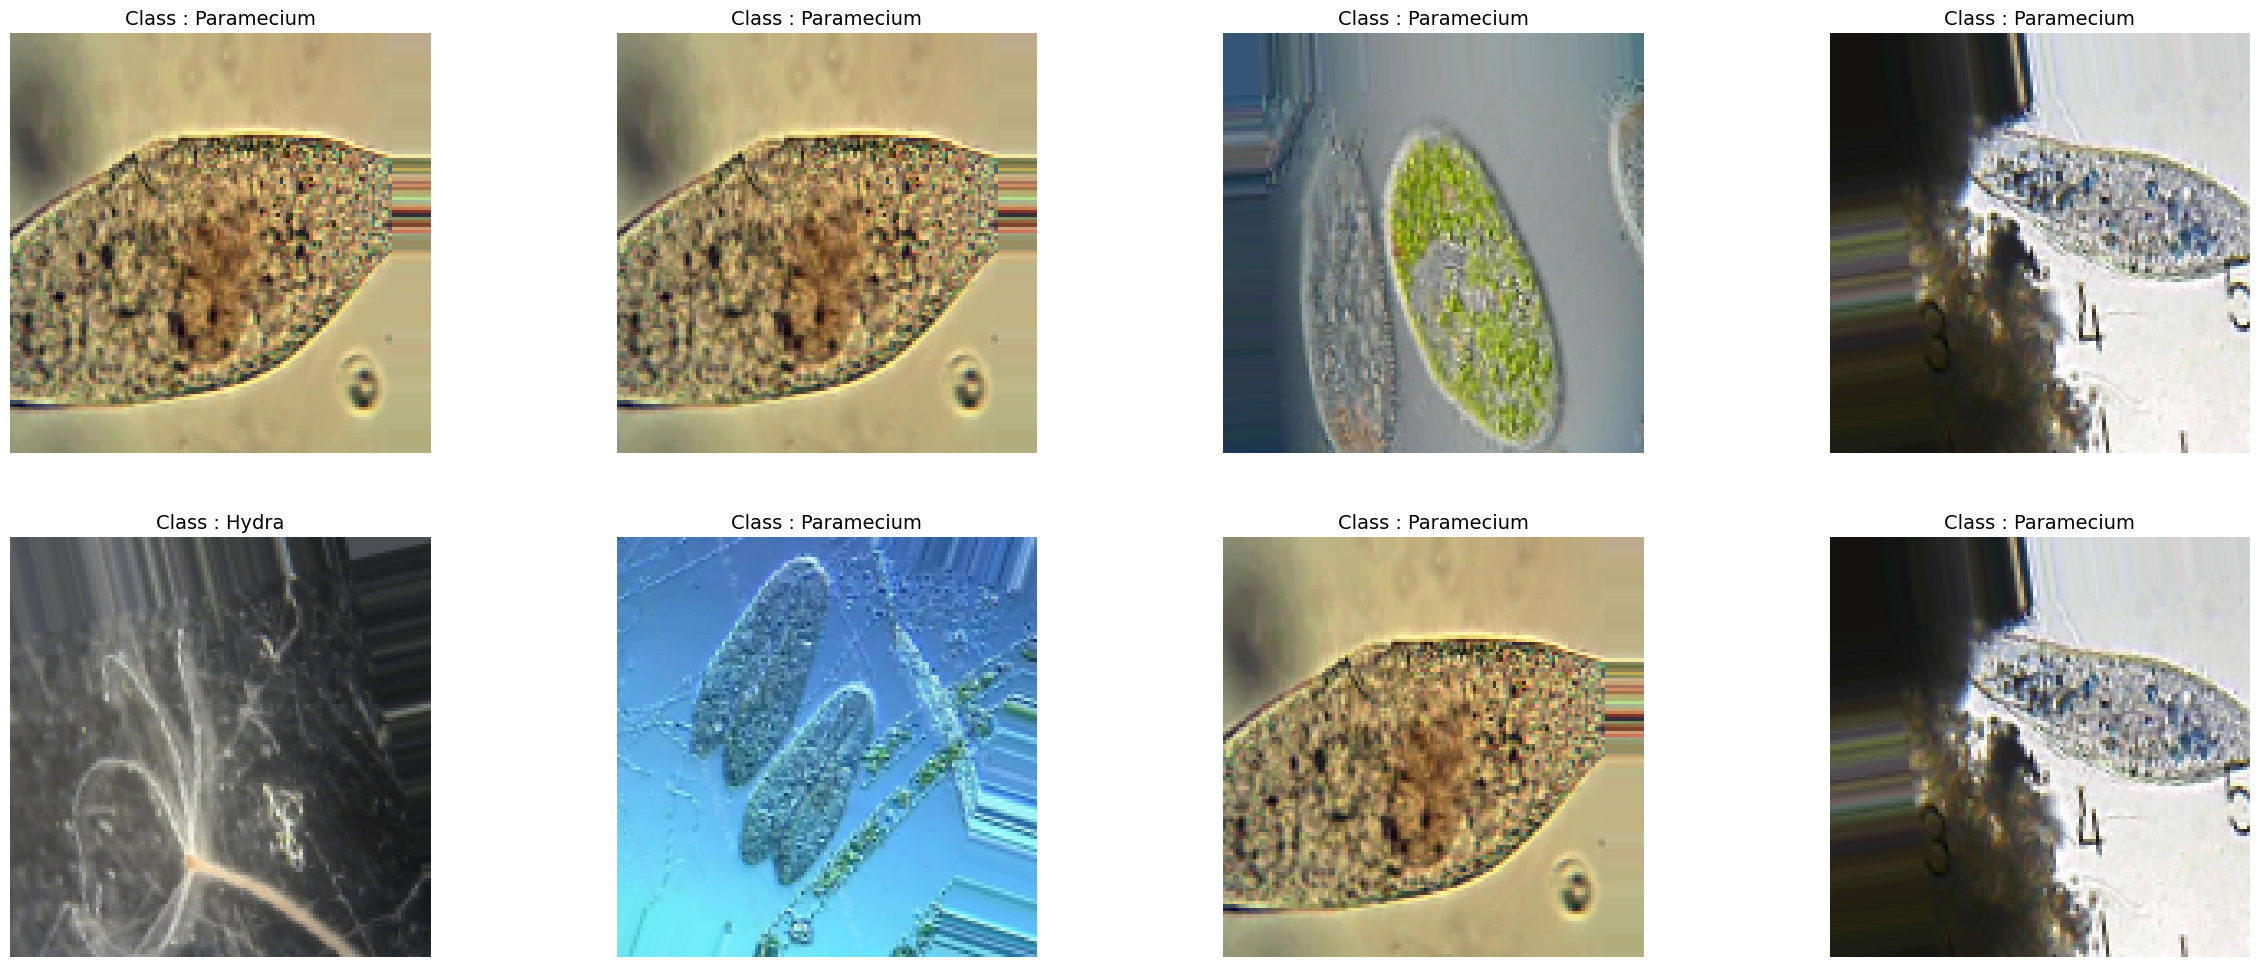

In [13]:
show_images(data=train_generator)

In [14]:


# weights_path = '/kaggle/input/resent/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

# Set the weights for each layer in the model
for layer in base_model.layers:
    layer.trainable = False
# # Freeze the weights of the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False

# Print the model summary
base_model.summary()



94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

### Add custom head for binary classification
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x= Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input,outputs= x)


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=RMSprop(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model

In [15]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x =Flatten()(x)
x = Dense(128, activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs = base_model.input, outputs = x)

In [16]:
# Add additional layers on top of the base model
# x = base_model.output
# x = Dense(128, activation='relu')(x)
# predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model by specifying the inputs and outputs
# model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Print the model summary
# model.summary()
# # Add custom head for binary classification
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.7)(x)
# x= Dense(1, activation='sigmoid')(x)

# model = Model(inputs=base_model.input,outputs= x)


# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# # Train the model

In [17]:
#Callbacks
learning_reduce = ReduceLROnPlateau(patience=2,monitor="val_acc",verbose=1,min_lr=0.00001,factor=0.5)
cbs = [learning_reduce]

In [18]:
epochs = 50

history=model.fit(
    train_generator,validation_data=test_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,callbacks=cbs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print("Test Accuracy:", test_accuracy)


Epoch 1/50
27/27 [==============================] - 21s 192ms/step - loss: 0.7450 - accuracy: 0.4953 - val_loss: 0.6911 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 2/50
27/27 [==============================] - 2s 93ms/step - loss: 0.7104 - accuracy: 0.5327 - val_loss: 0.7075 - val_accuracy: 0.4561 - lr: 0.0010
Epoch 3/50
27/27 [==============================] - 3s 97ms/step - loss: 0.7179 - accuracy: 0.5234 - val_loss: 0.6896 - val_accuracy: 0.5614 - lr: 0.0010
Epoch 4/50
27/27 [==============================] - 3s 99ms/step - loss: 0.7016 - accuracy: 0.4673 - val_loss: 0.6876 - val_accuracy: 0.5439 - lr: 0.0010
Epoch 5/50
27/27 [==============================] - 3s 97ms/step - loss: 0.7008 - accuracy: 0.5561 - val_loss: 0.6884 - val_accuracy: 0.5965 - lr: 0.0010
Epoch 6/50
27/27 [==============================] - 3s 97ms/step - loss: 0.7058 - accuracy: 0.5047 - val_loss: 0.6870 - val_accuracy: 0.5614 - lr: 0.0010
Epoch 7/50
27/27 [==============================] - 3s 95ms/step - loss: 0

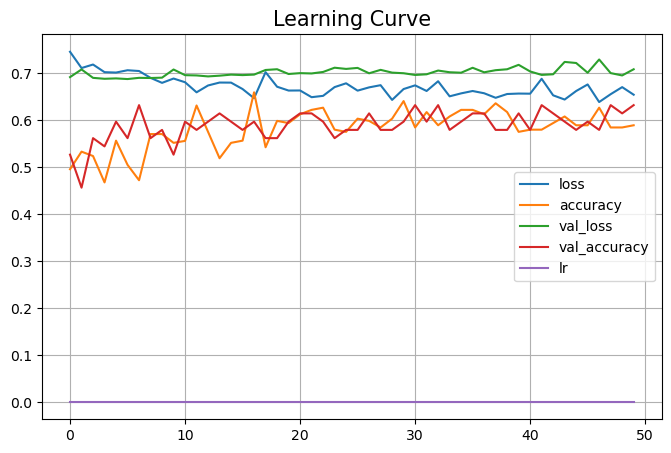

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

In [20]:
#

In [21]:
#show_images(data=train_generator,model=model)

***Print The training data accuracy and confusion Matrix***

8/8 [==============================] - 1s 28ms/step
Test Set Metrics:
Accuracy: 63.16%
F1 Score: 67.69%


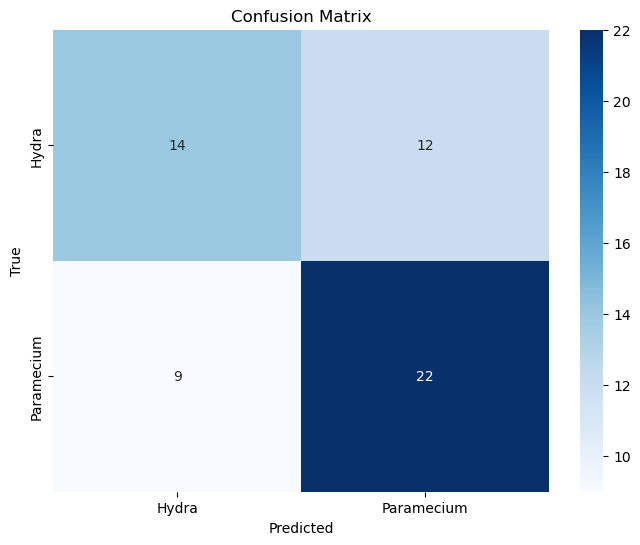

In [22]:
# Make predictions on the test set
test_pred = np.round(model.predict(test_generator)).flatten()
test_true = test_generator.classes
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_score(test_true, test_pred)*100:.2f}%")
print(f"F1 Score: {f1_score(test_true, test_pred)*100:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(test_true, test_pred)

# Define class labels
class_names = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score

# Make predictions on the training set
train_pred = np.round(model.predict(train_generator)).flatten()
train_true = train_generator.classes


# Calculate and print evaluation metrics for the training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_score(train_true, train_pred):.4f}")
print(f"F1 Score: {f1_score(train_true, train_pred):.4f}")





28/28 [==============================] - 2s 78ms/step
Training Set Metrics:
Accuracy: 0.5586
F1 Score: 0.6449


In [24]:
# from tensorflow.keras.preprocessing import image

# image_path = '/kaggle/input/hydra-paramecium-dataset/micro-dataset/Paramecium/Image_12.jpg'
# img = image.load_img(image_path, target_size=(img_width, img_height))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img / 255.0  # Normalize the image
# prediction = model.predict(img)
# print(prediction)
# predicted_label = class_labels[int(np.round(prediction)[0])]
# print(predicted_label)